# Lab 03

In [1]:
# # read in the csv files for testing and training data-sets
import pandas as pd
train = pd.read_csv("fashion-mnist_train.csv")
train_nolabel = train.drop(['label'], axis=1)
train_label = train['label']
print(train_label)
test = pd.read_csv("fashion-mnist_test.csv")
test_nolabel = test.drop(['label'], axis=1)
test_label = test['label']
print(test_nolabel)

0        2
1        9
2        6
3        0
4        3
5        4
6        4
7        5
8        4
9        8
10       0
11       8
12       9
13       0
14       2
15       2
16       9
17       3
18       3
19       3
20       8
21       7
22       4
23       4
24       0
25       4
26       4
27       8
28       7
29       1
        ..
59970    7
59971    5
59972    2
59973    8
59974    7
59975    9
59976    5
59977    8
59978    6
59979    5
59980    0
59981    5
59982    5
59983    5
59984    7
59985    6
59986    6
59987    5
59988    5
59989    4
59990    0
59991    5
59992    5
59993    2
59994    9
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0    

In [2]:
print(train_nolabel.shape,
test_nolabel.shape)
# train/test split is 6/1

(60000, 784) (10000, 784)


In [3]:
train_nolabel.head()
# All pixels are labeled 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Maxcolname = max(train)
train[Maxcolname].max()

255

In [5]:
test[max(test)].max()
# highest intensity/brightness of a pixel is 255

255

In [6]:
off = ((train_nolabel == 0).sum()).sum()
high_on = ((train_nolabel > 250).sum()).sum()

In [7]:
off/high_on
# There is ~ a 40:1 ratio of off pixels to very dark pixels in the training dataset. 
# Images are surrounded by a lot of white space

40.54905561520292

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

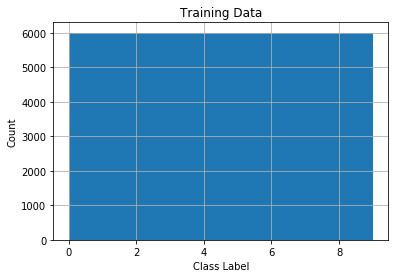

In [31]:
train.hist(column='label')
plt.ylabel('Count')
plt.xlabel('Class Label')
plt.title('Training Data')
plt.show()

In [10]:
train.label.unique()
# All classificiations are distributed equally in the training dataset

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

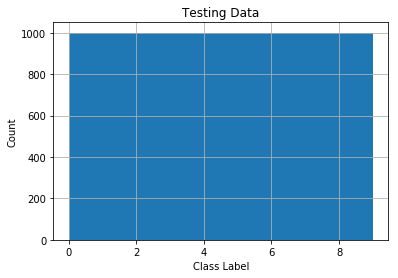

In [32]:
test.hist(column='label')
plt.ylabel('Count')
plt.xlabel('Class Label')
plt.title('Testing Data')
plt.show()
# All classificiations are distributed equally in the testing dataset

# Train & Test Linear SVC model

In [12]:
# import the LinearSVC model
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(dual=False, max_iter=3000)

# use the training data to train the model
svm_clf.fit(train_nolabel,train_label)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
# print confusion matrix and classification report

from sklearn.metrics import confusion_matrix
svm_clf_train = svm_clf.score(train_nolabel,train_label)
print('Overall training accuracy of Linear SVC: ', svm_clf_train)

Overall training accuracy of Linear SVC:  0.8727833333333334


In [17]:
testlabel_pred = svm_clf.predict(test_nolabel)
cm = confusion_matrix(test_label, testlabel_pred, labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)
print()

[[814  10  21  48   2   3  84   0  18   0]
 [  4 970   5  12   2   2   4   1   0   0]
 [ 19   7 768  12 120   0  63   0  11   0]
 [ 26  26  15 873  27   2  24   3   4   0]
 [  1   3  69  29 812   0  83   0   3   0]
 [  2   3   0   1   1 894   0  58  10  31]
 [167  12 111  46  89   0 556   0  19   0]
 [  0   1   0   0   0  30   0 923   1  45]
 [  6   4   6  13   2  14  20  10 920   5]
 [  0   0   0   0   1  19   0  41   1 938]]



In [19]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4', '5', '6', '7', '8', '9']
print(classification_report(test_label, testlabel_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.94      0.97      0.95      1000
           2       0.77      0.77      0.77      1000
           3       0.84      0.87      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.93      0.89      0.91      1000
           6       0.67      0.56      0.61      1000
           7       0.89      0.92      0.91      1000
           8       0.93      0.92      0.93      1000
           9       0.92      0.94      0.93      1000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



# Train & Test Neural Network

In [24]:
from sklearn.neural_network import MLPClassifier
# hidden layer chosen by dividing features (pixels) and classes by 2. 
# Then using two layers for robustness (perhaps over-kill) 
NN_clf = MLPClassifier()
NN_clf.fit(train_nolabel,train_label)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
# print confusion matrix and classification report

NN_clf_train = NN_clf.score(train_nolabel,train_label)
print('Overall training accuracy of Neural Network: ', NN_clf_train)

Overall training accuracy of Neural Network:  0.9017


In [26]:
testlabel_pred2 = NN_clf.predict(test_nolabel)
cm2 = confusion_matrix(test_label, testlabel_pred2, labels=[0,1,2,3,4,5,6,7,8,9])
print(cm2)
print()

[[736   6  17  40   0   2 192   1   6   0]
 [  4 980   0  11   1   0   4   0   0   0]
 [  3   3 739  12 131   0 109   0   3   0]
 [ 24  17   8 896  21   0  32   0   2   0]
 [  0   2  49  35 833   0  81   0   0   0]
 [  0   0   0   2   0 919   2  50   1  26]
 [113   9  69  34  84   0 681   0  10   0]
 [  0   0   0   1   0  12   0 930   1  56]
 [  3   0   4   5   5   4  43   3 932   1]
 [  0   0   0   1   0   2   0  30   1 966]]



In [27]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4', '5', '6', '7', '8', '9']
print(classification_report(test_label, testlabel_pred2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1000
           1       0.96      0.98      0.97      1000
           2       0.83      0.74      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.77      0.83      0.80      1000
           5       0.98      0.92      0.95      1000
           6       0.60      0.68      0.64      1000
           7       0.92      0.93      0.92      1000
           8       0.97      0.93      0.95      1000
           9       0.92      0.97      0.94      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

